# Importing modules

In [1]:
# Plots

# Matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

#   Creating a data-frame of the initial data-set samples details which will be used later

In [2]:
f = open('names.txt', 'r')
names = []
for line in f:
    names.append(line[:-1])
f.close()

nc = []
for i in names:
    a = i.replace(' ', '')
    nc.append(a)
    
gr = []
for i in names:
    if 'papio cynocephalus' in i:
        gr.append('papio cynocephalus')
    elif 'mandrillus leucophaeus' in i:
        gr.append('mandrillus leucophaeus')
    elif 'Macaca mulatta' in i:
        gr.append('Macaca mulatta')    
    elif 'lophocebus albigena' in i:
        gr.append('lophocebus albigena')
    elif 'lophocebus aterrimus' in i:  
        gr.append('lophocebus aterrimus')
    else:
        gr.append('Cercocebus torquatus')
        
df = pd.DataFrame()
df['group'] = gr

f = open('sex.txt', 'r')
sex = []
for line in f:
    sex.append(line[:-1])
f.close()

encoder = LabelEncoder()
y = encoder.fit_transform(df.iloc[:, 0])

df['encoded'] = y

df['sex'] = sex

df ['complete'] = nc

df.to_excel('data_labels.xlsx')

df.head()

,group,encoded,sex,complete
0,papio cynocephalus,5,Male,papiocynocephalus66.491
1,papio cynocephalus,5,Female,papiocynocephalus61.778
2,papio cynocephalus,5,Male,papiocynocephalus61.735
3,papio cynocephalus,5,Female,papiocynocephalus61.737
4,papio cynocephalus,5,Female,papiocynocephalus61.768


# The main class

In [3]:
from Morphometrics import procpca as procpca

In [4]:
prpca = procpca(df)

/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


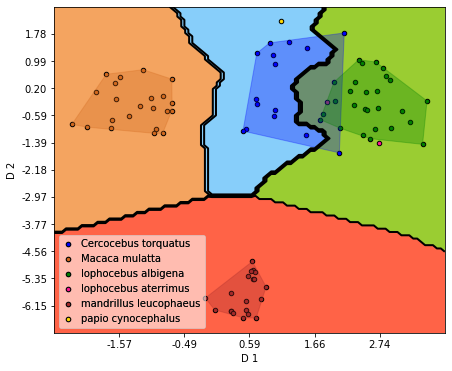

In [5]:
prpca = procpca(df)
dataf, datag, ind, name = prpca.read('without papio cynocephalus_8_remains.txt')
prpca.post_process(deletg='papio cynocephalus')
prpca.plot_tsne(n_r=3, decision_boundary = True, cv = True, dlegend = True, index_r = 0, perplexity=40, n_neighbors=6)
plt.show()

In [6]:
# An example of reading the results and ploting the first 3 principal components
prpca = procpca(df)
dataf, datag, ind, name= prpca.read('without papio cynocephalus_8_remains.txt')

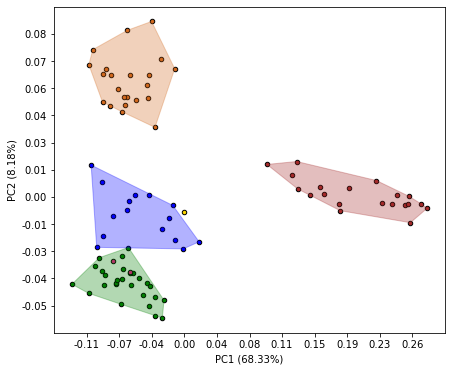

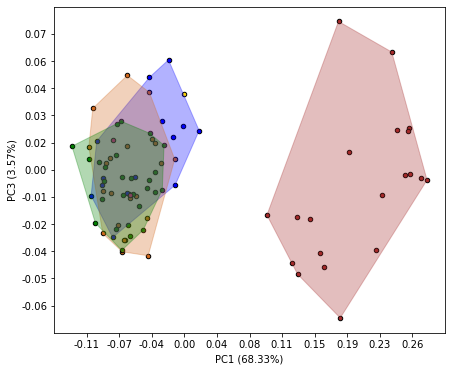

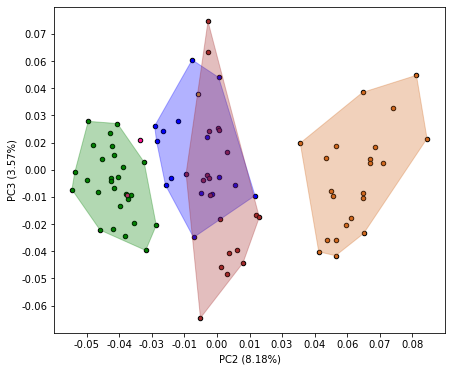

In [7]:
# Creating PCA plots
prpca.PCAplot(sav1 = 0, sav2 = 'without papio cynocephalus_8_remains.txt',
    sav3 = '.svg', annote = False, index_r = 0)
    
plt.show()

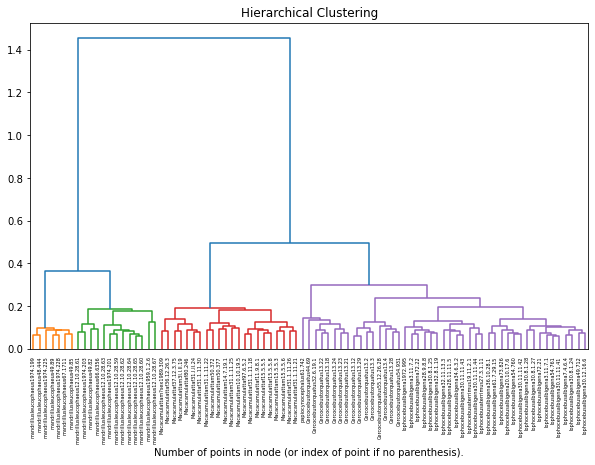

In [8]:
# Dendrogram
prpca.plot_dendrogram()
    
plt.show()

/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


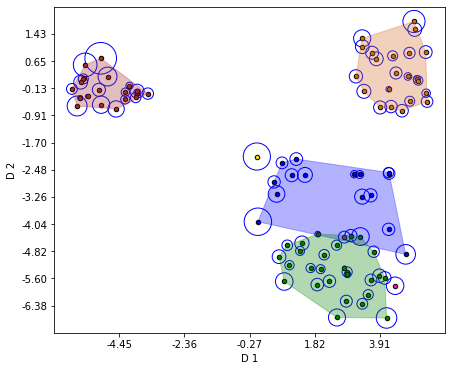

In [9]:
# Local outlier factor t-SNE plot
prpca.plot_tsne(localo = True, index_r = 0, perplexity=30, n_neighbors=5)
    
plt.show()

/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/nima/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


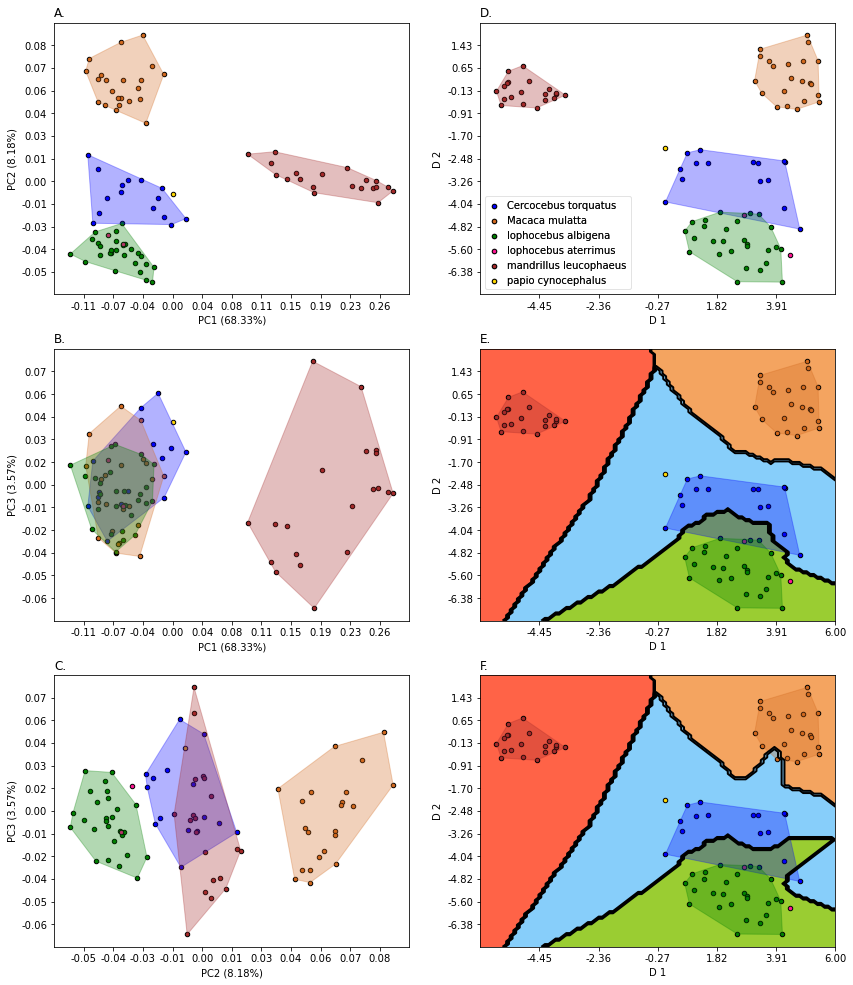

In [10]:
# Plotting the PCA and t-SNE plots together

fig, fig_axes = plt.subplots(ncols=2, nrows=3, figsize=(14,17))

prpca.PCAplotm(prpca.y, prpca.x, ind1=1, ind2=2, ax = fig_axes[0,0], index_r = 0, dlegend = False)
fig_axes[0,0].set_title('A.', fontsize = 12, loc = 'left')
prpca.PCAplotm(prpca.y, prpca.x, ind1=1, ind2=3, ax = fig_axes[1,0], index_r = 0, dlegend = False)
fig_axes[1,0].set_title('B.', fontsize = 12, loc = 'left')
prpca.PCAplotm(prpca.y, prpca.x, ind1=2, ind2=3, ax = fig_axes[2,0], index_r = 0, dlegend = False)
fig_axes[2,0].set_title('C.', fontsize = 12, loc = 'left')
prpca.plot_tsne(ax = fig_axes[0,1], index_r = 0, dlegend = True, perplexity=30)
fig_axes[0,1].set_title('D.', fontsize = 12, loc = 'left')
prpca.plot_tsne(decision_boundary = True, cv = False, ax = fig_axes[1,1], n_r = 3, index_r = 0, perplexity=30)
fig_axes[1,1].set_title('E.', fontsize = 12, loc = 'left')
prpca.plot_tsne(decision_boundary = True, cv = True, ax = fig_axes[2,1], n_r = 3, index_r = 0, perplexity=30)
fig_axes[2,1].set_title('F.', fontsize = 12, loc = 'left')

plt.savefig('combined_plot_all.svg', transparent = True)
plt.show()